## Keras Functional API



Look at this complex model

#### Question: Can you design this model using Keras Sequential API ?
- No, there is no way to pass two inputs to one layer in Sequential API
- We use another API of Keras called as Functional API to design such complex models

 <img width=50% src='https://drive.google.com/uc?id=1Gzjwzg9pfJFlewyjMN_0uBiWA7_rKnXT'>


#### Why do we need Functional API instead of Sequential API?

- Functional API gives us **more flexibility**
- This API can handle **multiple inputs and outputs**
- lets say we have an image and a text description as our training data
- Or we want model to output two or more target variables
- Ex- A weather forecast model predicting Min & Max temp at the same time
- Sequential API wont be able to do this

Look at this complex model design, it can not be created using Sequential API but easily by Functional API
- Multiple inputs to one layer
- Multiple outputs of one layer

 <img src='https://drive.google.com/uc?id=1gqeSg6z5ckj6NAS9v011P9c7j8EbG3--'>

- So functional api gives us more **flexibility for network architectures**
- architectures are not always in sequential manner
- we can have two layers in parallel  

- It is always recommend to **use the simplest method while building networks**
- Simple models can be easily built with Sequential API
- But sometimes we need the flexibility

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
model_sequential = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

- Earlier we have created this model using Sequential API
- Now lets create same model using Functional API

In [ ]:
from tensorflow.keras.layers import Input

- In Sequential we passed input shape in the first layer
- But Here we will be using an additional layer : **Input layer**
- we're going to explicitly have a separate layer to represent the data input.

- Another main diference is `tf.keras.models.Model`
- Here instead of Sequential, here **we will be using Model Class**

### Keras Functional Model Class

- First we create an input layer with the shape of the dataframe

In [ ]:
inp = Input(shape=(11, 1))

- Next we will be creating our first two layer of the model
- Instead of creating a list (as in Sequential)
- We will also pass previous layer in the current layer
- In first dense `hidden_1` we will pass `inp`
- And in second `hidden_1` we will pass `hidden_2`

In [ ]:
h1 = Dense(16, activation="relu", name="hidden_1")(inp)
h2 = Dense(4, activation="relu", name="hidden_2")(h1)

- Now we will create the final output layer

In [ ]:
out = Dense(4, activation="softmax", name="output")(h2)

- We have defined the flow of the model
- Finally,  to built a model using this directed graph
- We will use `tf.keras.models.Model`, and pass all the inputs and outputs

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model_functional = Model(inputs=inp, outputs=out, name="simple_nn")

Let's generalize above code inside a function

In [ ]:
def create_model_functional():

  inp = Input(shape=(11, 1))

  h1 = Dense(16, activation="relu", name="hidden_1")(inp)
  h2 = Dense(8 , activation="relu", name="hidden_2")(h1)

  out = Dense(4, activation="softmax", name="output")(h2)

  model = Model(inputs=inp, outputs=out, name="simple_nn")
  return model

In [ ]:
model_functional = create_model_functional()

In [ ]:
model_functional.summary()

Model: "simple_nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 hidden_1 (Dense)            (None, 11, 16)            32        
                                                                 
 hidden_2 (Dense)            (None, 11, 8)             136       
                                                                 
 output (Dense)              (None, 11, 4)             36        
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


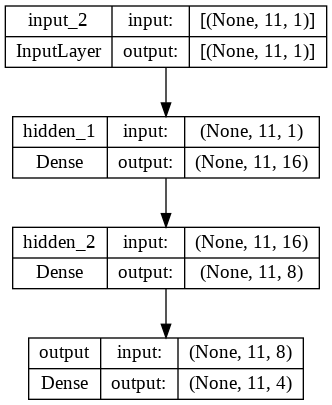

In [ ]:
#And, optionally, display the input and output shapes of each layer in the plotted graph:

tf.keras.utils.plot_model(model_functional,show_shapes=True)

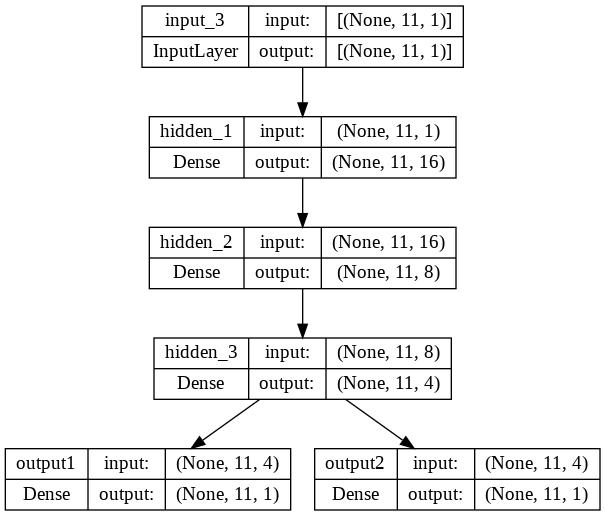

In [ ]:
# let's create a little complex model using functional API's with more than one output

def create_model_multiple_output():
  inp = Input(shape=(11, 1))

  h1 = Dense(16, activation="relu", name="hidden_1")(inp)
  h2 = Dense(8 , activation="relu", name="hidden_2")(h1)
  h3 = Dense(4 , activation="relu", name="hidden_3")(h2)

  out1 = Dense(1, activation="sigmoid", name="output1")(h3)
  out2 = Dense(1, activation="relu", name="output2")(h3)

  model = Model(inputs=inp, outputs=[out1,out2], name="simple_nn")
  return model

# creating model with multiple output
model_multiple_output = create_model_multiple_output()

# plotting model with multiple output
tf.keras.utils.plot_model(model_multiple_output,show_shapes=True)